In [0]:
import os
                            
print(os.listdir("/kaggle/input"))

This is the NLP modek for toxic comment challenge application. For it I use kaggle.com developing tools. Also the data is stored distantly in a storage called kaggle kernels

In [0]:
# code to see the input data

for k_directory, _, doc_names in os.walk('/kaggle/input'): # path for datasets
    for doc_names in doc_names:
        print(os.path.join(k_directory, doc_names))
        
# Python method walk() generates the file names in a directory tree by walking the tree either top-down or bottom-up.

If we want to see content of any of these files we need to use read_csv() and after iloc() or head() to see the content.

In [0]:
# DataFram
import pandas as pd

df_ex = pd.read_csv("/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/amazon_cells_labelled.csv")

df_ex.head()
# df.iloc[103]

It is necessary to write head() and tail() methods in different code blocks due to their execution sequence - if both were in the one block,then the last method result would be printed only.

In [0]:
df_ex.tail()

In [0]:
print(df_ex.iloc[103])
print('\n')
print(df_ex.iloc[785])

In [0]:
# nrows : int, optional - change how many picese rows would be read

In [0]:
wdata_path = {'imdb_dataset':   '/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/imdb_labelled.txt',
         'yelp_dataset':   '/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt',
         'amazon_dataset': '/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences/amazon_cells_labelled.txt'}

ds_arr = []
for origin, doc_name in wdata_path.items():
    wdataset = pd.read_csv(doc_name, names=['text','zscore'], sep='\t')
    wdataset['origin'] = origin
    ds_arr.append(wdataset)

#ndataset is data frame - each .txt file in our data repository, ds_arr  - list of 3 datasets

As we have several different files in our dataset we need to concat them all together. It is recommended to do so as it would enable the working over all of them but not only over 1 file.

In [0]:
wdataset = pd.concat(ds_arr)
wdataset.iloc[2015]

Glob is one of Python many modules. It is often used to find a filename which suits prescribed features like format. It return filenames with their pathnames.

In [0]:
pip install glob3

In [0]:
import os
import glob

path = '/kaggle/input/sentiment-labelled-sentences-data-set/sentiment labelled sentences'
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)

In [0]:
wdataset.info()

Here we can see that sentence of the 2100-th position has Name: 100 and origin - amazon_dataset, so that illustrates how 3 datasets are places after each other. Amazon is placed last, the 3rd one.

In [0]:
wdataset.iloc[2223]

In [0]:
from __future__ import print_function
#https://docs.python.org/2/library/__future__.html

wdataset = pd.concat(ds_arr)

print(wdataset.iloc[5])
print('\n') 
print(wdataset.iloc[500])
print('\n') 
print(wdataset.iloc[999])
print('\n') 
print(wdataset.iloc[1000])
print('\n') 
print(wdataset.iloc[1100])
print('\n') 
print(wdataset.iloc[1850])
print('\n') 
print(wdataset.iloc[1893])
print('\n') 
print(wdataset.iloc[2001])
print('\n') 
print(wdataset.iloc[2999])
print('\n')

As we have several fileas in the dataset it is possible to proceed any of them separatly from each other. The path variable has been already defined.

In [0]:
ndataset_imdb = wdataset[wdataset['origin'] == 'yelp_dataset']

In [0]:
ndataset_imdb.head()

In [0]:
ndataset_imdb.tail()

So we can switch between different documents which are forming current dataset.

MATPLOTLIB GRAPH as example:

In [0]:
# Counter 
from collections import Counter
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
decode_map = {0: "negative_sentiment", 1: "positive_sentiment"}
def decode_sentiment(sc):
    return decode_map[int(sc)]

In [0]:
%%time
wdataset.zscore = wdataset.zscore.apply(lambda x: decode_sentiment(x))

On the Pyplot graph we can see how many sentences have either positive or negative sentiment. It comes out that positive sentences are slightely prevailing.

In [0]:
zs_cnt = Counter(wdataset.zscore)

plt.figure(figsize=(22,12))
plt.bar(zs_cnt.keys(), zs_cnt.values())
plt.title("Distribuition of score sentiment of all Amazon, IMDB and Yelp together")

On the code below we will find out the percise difference in amount of negative and positive sentences.

We can navigate in pandas dataframe and sort the sentences:

In [0]:
only_negative_zscores = ["0"]
wdataset.loc[wdataset['zscore'].isin(only_negative_zscores)]

In [0]:
only_positive_zscores = ["1"]
wdataset.loc[wdataset['zscore'].isin(only_positive_zscores)]

>

**RNN MODEL for Machine Learning ** vers. 1

In [0]:
comments =  wdataset.text
sentpoints = wdataset.zscore

#example
comments.iloc[2000].lower()

In [0]:
from string import punctuation

def preprocess(wcontent):
    wcontent = "".join([ch for ch in wcontent if ch not in punctuation]) # w means whole
    wcontent = wcontent.lower() 
    tcomments = wcontent.split("\n") # t_ means total
    wcontent = " ".join(wcontent)
    twords = wcontent.split()
    
    return tcomments, twords


tcomments, twords = preprocess(comments)
print(twords)

In [0]:
from collections import Counter

word_counter = Counter(twords)
word_list = sorted(word_counter)
vocab_to_int = {word:idx+1for idx, word in enumerate(word_list)}
#print(vocab_to_int)
int_to_vocab = {idx:word for word, idx in vocab_to_int.items()}
# print(int_to_vocab)
#encoded_reviews = [[vocab_to_int[word] for word in comment] for comment in tcomments]
#print(len(int_to_vocab))

In [0]:
comments.iloc[2700]

In [0]:
def pad_text(comments, seq_length):
    
    comments_pad = []
    
    for comment in comments:
         comments_pad.append(comment[:seq_length])
        
    return np.array(comments_pad)


padded_comments = pad_text(comments, seq_length = 150)

In [0]:
import numpy as np
import torch

train_ratio = 0.8
valid_ratio = (1 - train_ratio)/2
total = padded_comments.shape[0]
train_cutoff = int(total * train_ratio)
valid_cutoff = int(total * (1 - valid_ratio))

train_x, train_y = padded_comments[:train_cutoff], sentpoints[:train_cutoff]

valid_x, valid_y = padded_comments[:train_cutoff : valid_cutoff], sentpoints[train_cutoff : valid_cutoff]
test_x, test_y = padded_comments[valid_cutoff:], sentpoints[valid_cutoff:]

from torch.utils.data import TensorDataset, DataLoader

train_data = TensorDataset(train_x, train_y)
valid_data = TensorDataset(valid_x, valid_y)
test_data = TensorDataset(test_x, test_y)

**MODEL for Machine Learning ** vers. 2

In [309]:
from keras import utils

# Word2vec
import gensim
# Utility
# import numpy as np
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO )#info
                                    

In [0]:
# DATASET_COLUMNS = ["text", "zscore"]
# DATASET_ENCODING = "ISO-8859-1"
# dataset_path ="../input/sentiment140/training.1600000.processed.noemoticon.csv"
# df = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [311]:
neg_values = ["0"]
wdataset.loc[wdataset['zscore'].isin(some_values)]

,text,zscore,origin
0,"A very, very, very slow-moving, aimless movie ...",0,imdb_dataset
1,Not sure who was more lost - the flat characte...,0,imdb_dataset
2,Attempting artiness with black & white and cle...,0,imdb_dataset
3,Very little music or anything to speak of.,0,imdb_dataset
5,"The rest of the movie lacks art, charm, meanin...",0,imdb_dataset
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon_dataset
996,What a piece of junk.. I lose more calls on th...,0,amazon_dataset
997,Item Does Not Match Picture.,0,amazon_dataset
998,The only thing that disappoint me is the infra...,0,amazon_dataset


In [312]:
# nltk !!!!!!
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re #important!

nltk.download('stopwords')
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [313]:
stop_words = stopwords.words("english")

stemmer = SnowballStemmer("english")

In [314]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [315]:
%%time
wdataset.text = wdataset.text.apply(lambda x: preprocess(x))

CPU times: user 128 ms, sys: 4 ms, total: 132 ms
Wall time: 141 ms


In [319]:
from sklearn.model_selection import train_test_split

trsize = 0.8

In [320]:
wdataset_train, wdataset_test = train_test_split(wdataset, test_size=1-trsize, random_state=32)
print("train size:", len(wdataset_train))
print("test size:", len(wdataset_test))

train size: 2198
test size: 550


Add Gensim (Word2Vec) features

In [322]:
sizewv = 150
windowwv = 5
epochwv = 24
mincontwv = 10

In [328]:
%%time
docs = [_text.split() for _text in wdataset_train.text] # _ before varibale means that its made for internal use

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.76 ms


In [329]:
wvmodel = gensim.models.word2vec.Word2Vec(size=sizewv, 
                                            window=windowwv, 
                                            min_count=mincontwv, 
                                            workers=8)

In [330]:
wvmodel.build_vocab(docs)

In [338]:
voc = wvmodel.wv.vocab.keys()
voclen1 = len(voc) - 1 
print("Vocab length is", voclen)

Vocab length is 272


In [332]:
%%time
wvmodel.train(docs, total_examples = len(docs), epochs = epochwv)

CPU times: user 548 ms, sys: 40 ms, total: 588 ms
Wall time: 418 ms


(109747, 345504)

In [333]:
wvmodel.most_similar("excellent")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('bought', 0.9996883273124695),
 ('picture', 0.9996625185012817),
 ('low', 0.9996414184570312),
 ('everything', 0.999634325504303),
 ('buy', 0.9996300935745239),
 ('amazing', 0.9996134638786316),
 ('wonderful', 0.9996132850646973),
 ('flavor', 0.9996122121810913),
 ('rather', 0.9996106624603271),
 ('perfect', 0.9996094703674316)]

In [339]:
from keras.preprocessing.text import Tokenizer

In [357]:
%%time
tknzr = Tokenizer()
tknzr.fit_on_texts(wdataset_train.text)

voclen2 = len(tknzr.word_index) + 1
print("Total words", voclen2)

Total words 4343
CPU times: user 64 ms, sys: 0 ns, total: 64 ms
Wall time: 95.2 ms


In [341]:
print("Total words", voclen2)

Total words 4494


In [358]:
from keras.preprocessing.sequence import pad_sequences
seqlen = 150

In [362]:
%%time
x_train = pad_sequences(tknzr.texts_to_sequences(wdataset_train.text), maxlen = seqlen)
x_test = pad_sequences(tknzr.texts_to_sequences(wdataset_test.text), maxlen = seqlen)

CPU times: user 88 ms, sys: 4 ms, total: 92 ms
Wall time: 87.1 ms


In [363]:
# SENTIMENT
neg = "negative_sentiment"
pos = "positive_sentiment"
thresholds = (0, 1)

In [347]:
from sklearn.preprocessing import LabelEncoder

In [361]:
stringenc = LabelEncoder()
stringenc.fit(wdataset_train.zscore.tolist())

y_train = stringenc.transform(wdataset_train.zscore.tolist())
y_test = stringenc.transform(wdataset_test.zscore.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (2198, 1)
y_test (550, 1)


In [364]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (2198, 150)
y_train (2198, 1)

x_test (550, 150)
y_test (550, 1)


In [365]:
y_train[:10]

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [0]:
#import numpy as np

In [366]:
embedding_matrix = np.zeros((voclen2, sizewv))
for word, i in tknzr.word_index.items():
  if word in wvmodel.wv:
    embedding_matrix[i] = wvmodel.wv[word]
print(embedding_matrix.shape)

(4343, 150)


In [367]:
from keras.layers import Embedding

In [371]:
embedding_layer = Embedding(voclen2, sizewv, weights=[embedding_matrix], input_length=seqlen, trainable=False)
# convernt string to binary

In [369]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, LSTM

In [372]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 150)          651450    
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 751,951
Trainable params: 100,501
Non-trainable params: 651,450
_________________________________________________________________


In [373]:
model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

In [374]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [375]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [378]:
bs = 512
es = 6

In [379]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=bs,
                    epochs=es,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 1978 samples, validate on 220 samples
Epoch 1/6
1978/1978 [==============================] - 5s 3ms/step - loss: 0.6906 - accuracy: 0.5394 - val_loss: 0.6956 - val_accuracy: 0.4818
Epoch 2/6
1978/1978 [==============================] - 5s 3ms/step - loss: 0.6886 - accuracy: 0.5465 - val_loss: 0.6948 - val_accuracy: 0.5409
Epoch 3/6
1978/1978 [==============================] - 5s 3ms/step - loss: 0.6875 - accuracy: 0.5470 - val_loss: 0.6943 - val_accuracy: 0.5273
Epoch 4/6
1978/1978 [==============================] - 5s 2ms/step - loss: 0.6875 - accuracy: 0.5445 - val_loss: 0.6952 - val_accuracy: 0.5455
Epoch 5/6
1978/1978 [==============================] - 5s 2ms/step - loss: 0.6884 - accuracy: 0.5511 - val_loss: 0.6973 - val_accuracy: 0.4864
Epoch 6/6
1978/1978 [==============================] - 5s 3ms/step - loss: 0.6878 - accuracy: 0.5490 - val_loss: 0.6947 - val_accuracy: 0.5455
CPU times: user 1min 20s, sys: 12.9 s, total: 1min 33s
Wall time: 30.4 s


In [381]:
%%time
tresults = model.evaluate(x_test, y_test, batch_size=bs)
print()
print("Train accuracy:",tresults[1])
print("Train loss:",tresults[0])

550/550 [==============================] - 0s 820us/step

Train accuracy: 0.5109090805053711
Train loss: 0.6916645067388361
CPU times: user 1.06 s, sys: 212 ms, total: 1.27 s
Wall time: 455 ms


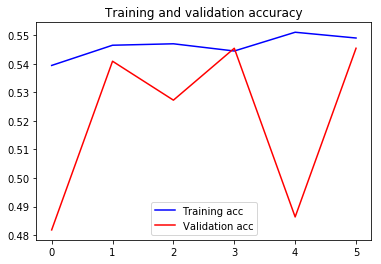

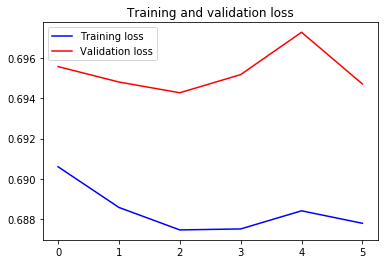

In [382]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training acc')
plt.plot(epochs, validation_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, validation_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [411]:
def decode_sentiment(sentimentsc, include_neutral=True):  
        return 'This comment has more negative sentiment' if sentimentsc < 0.5 else 'This comment has more positive sentiment'

In [412]:
def predict(text):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tknzr.texts_to_sequences([text]), maxlen = seqlen)
    # Predict
    sentimentsc = model.predict([x_test])[0]
    # Decode sentiment
    message = decode_sentiment(sentimentsc)

    return {"Meesage": message, "Zscore": float(sentimentsc),
       "Spent time": time.time()-start_at}

In [413]:
predict("I love the music")

{'Meesage': 'This comment has more positive sentiment',
 'Zscore': 0.5296000242233276,
 'Spent time': 0.09323000907897949}

In [414]:
predict("But, in any case, the best part is, you can download these pictures to your laptop using IR, or even send pictures from your laptop to the phone.")

{'Meesage': 'This comment has more positive sentiment',
 'Zscore': 0.5435210466384888,
 'Spent time': 0.0826568603515625}

In [415]:
predict("My phone sounded OK ( not great - OK), but my wife's phone was almost totally unintelligible, she couldn't understand a word being said on it")

{'Meesage': 'This comment has more positive sentiment',
 'Zscore': 0.5441583395004272,
 'Spent time': 0.039359331130981445}

In [416]:
predict("I'm returning them.")

{'Meesage': 'This comment has more negative sentiment',
 'Zscore': 0.4302859604358673,
 'Spent time': 0.10290646553039551}

In [417]:
predict("The best thing is that I did this")

{'Meesage': 'This comment has more positive sentiment',
 'Zscore': 0.5330216884613037,
 'Spent time': 0.026793956756591797}

In [418]:
predict("The thing is that I did this but with no success")

{'Meesage': 'This comment has more negative sentiment',
 'Zscore': 0.4629228711128235,
 'Spent time': 0.0190579891204834}

In [419]:
predict("I an happy with new work")

{'Meesage': 'This comment has more positive sentiment',
 'Zscore': 0.5584284663200378,
 'Spent time': 0.07579827308654785}

In [420]:
predict("After this evening he was anxious")

{'Meesage': 'This comment has more negative sentiment',
 'Zscore': 0.4302859604358673,
 'Spent time': 0.020168542861938477}

In [421]:
%%time
y_pred_1d = []
y_test_1d = list(wdataset_test.zscore)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

550/550 [==============================] - 1s 932us/step
CPU times: user 1.09 s, sys: 248 ms, total: 1.34 s
Wall time: 516 ms


In [426]:
# we will amnalyze the results with the help of sklearn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [429]:
kerasm = "model_kmodel.h5"
keraswvm = "wvmodel_kmodel.w2v"
kerastknzrm = "kmodel_tokenizer.pkl"
kerasencm = "kmodel_encoder.pkl"

In [0]:
model.save(kerasm)
w2v_model.save(keraswvm)
pickle.dump(tokenizer, open(kerastknzrm, "wb"), protocol=0)
pickle.dump(encoder, open(kerasencm, "wb"), protocol=0)